# **Import Required libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import zipfile
import os

# Define paths
zip_file_path = 'D:\\TRAFFIC_SIGN_RECOGNITION.zip'
extract_to_directory = 'D:\\TRAFFIC_SIGN_RECOGNITION'

# Extract ZIP file
os.makedirs(extract_to_directory, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

# Change directory to the extracted folder
os.chdir(extract_to_directory)

# Now you can continue with your code
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# **Store data,labels in the list**

In [2]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [3]:
cur_path

'D:\\TRAFFIC_SIGN_RECOGNITION'

# **Preprocess the images**

In [4]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

# **Converting List into numpy arrays**

In [5]:
data = np.array(data)
labels = np.array(labels)

# **Save Labels & Data for future use**

In [6]:

# Define the directory path
directory_path = './training'

# Create the directory if it does not exist
os.makedirs(directory_path, exist_ok=True)

# Assuming data and labels are your numpy arrays
np.save(os.path.join(directory_path, 'data.npy'), data)
np.save(os.path.join(directory_path, 'target.npy'), labels)

# Load data & labels

In [7]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [8]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# **Convert labels to onehot encoding**

In [11]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# **Build the model**

In [12]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [13]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 72s 72ms/step - loss: 1.9077 - accuracy: 0.5195 - val_loss: 0.4594 - val_accuracy: 0.8921
Epoch 2/20
981/981 [==============================] - 86s 88ms/step - loss: 0.6710 - accuracy: 0.8043 - val_loss: 0.2271 - val_accuracy: 0.9433
Epoch 3/20
981/981 [==============================] - 56s 57ms/step - loss: 0.4707 - accuracy: 0.8603 - val_loss: 0.1600 - val_accuracy: 0.9549
Epoch 4/20
981/981 [==============================] - 53s 54ms/step - loss: 0.3810 - accuracy: 0.8888 - val_loss: 0.1485 - val_accuracy: 0.9601
Epoch 5/20
981/981 [==============================] - 44s 45ms/step - loss: 0.3294 - accuracy: 0.9037 - val_loss: 0.1223 - val_accuracy: 0.9665
Epoch 6/20
981/981 [==============================] - 54s 55ms/step - loss: 0.3017 - accuracy: 0.9124 - val_loss: 0.1055 - val_accuracy: 0.9686
Epoch 7/20
981/981 [==============================] - 57s 58ms/step - loss: 0.2626 - accuracy: 0.9238 - val_loss: 0.0678 - val_accuracy:

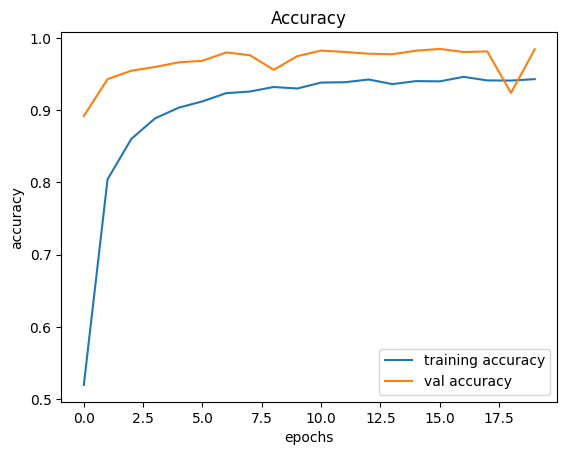

In [15]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

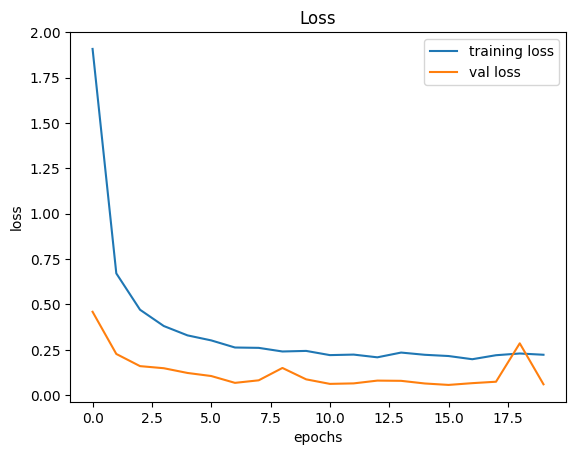

In [16]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# **Testing on test data**

In [17]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [18]:
X_test, label = testing('Test.csv')

In [20]:
# Get the probabilities for each class
probabilities = model.predict(X_test)

# Convert probabilities to class labels
Y_pred = np.argmax(probabilities, axis=1)

# Display the predicted class labels
Y_pred

395/395 [==============================] - 3s 7ms/step


array([16,  1, 38, ..., 15,  7, 10], dtype=int64)

# **Accuracy with test data**

In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9401425178147268


# **Save the model**

In [22]:
model.save("./training/TSR.h5")

# **Load the model**

In [23]:
import os
os.chdir(r'D:\Traffic_Sign_Recognition')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [24]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

1/1 [==============================] - 0s 137ms/step
Predicted traffic sign is:  Bumpy road


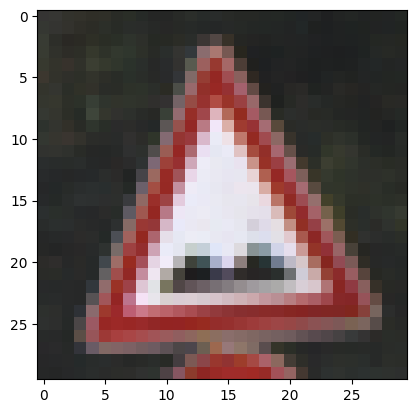

In [25]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array

def test_on_img(img_path):
    # Open and preprocess the image
    image = Image.open(img_path)
    image = image.resize((30, 30))  # Resize to match model input
    image_array = img_to_array(image)  # Convert to numpy array
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    
    # Predict using the model
    probabilities = model.predict(image_array)
    Y_pred = np.argmax(probabilities, axis=1)  # Get the index of the highest probability
    
    return image, Y_pred[0]

# Path to the image
img_path = r'D:\Traffic_Sign_Recognition\Test\00500.png'
plot, prediction = test_on_img(img_path)

# Map the prediction to the class label
print("Predicted traffic sign is: ", classes[prediction])

# Display the image
plt.imshow(plot)
plt.show()